# 1. Introductie: Waarom goniometrie?

•	Doel: Motiveer het onderwerp vanuit realiteit (bijv. dag-nacht-cyclus, seizoenen, geluidsgolven, hartslag).
•	Simulatie: Een schommelende slinger of een punt op een draaiende cirkel gekoppeld aan een golf.
•	Didactiek: Laat leerlingen voorspellen wat er gebeurt voordat je het toont.
•	Afbeelding: Realtime animatie van een sinusgolf die wordt gegenereerd door een draaiend punt op een cirkel (eenheidscirkel).

# 2. Graden vs. Radialen

## 2.1 Verband tussen graden en radialen

Een cirkel is gedefinieerd als 360°. De omtrek van een cirkel is beschreven met:  
\[
C = 2\pi r
\]

Als je de booglengte van een deel van een cirkel wilt berekenen, doe je dat met een verhouding:  
\[
C = \left( \frac{\theta}{360^\circ} \right) \cdot 2\pi r
\]

Voor een halve cirkel (\( \theta = 180^\circ \)) geeft dat een factor van \( \frac{1}{2} \).  
Voor een kwart cirkel (\( \theta = 90^\circ \)) is dat \( \frac{1}{4} \).

Bij een cirkel met straal \( r = 1 \) (de **eenheidscirkel**) kunnen we booglengtes direct uitdrukken in radialen. Hier is een overzicht:

| \( \theta \) (°) | \( C \) (rad)         |
|------------------|-----------------------|
| 0°               | \( 0 \)               |
| 30°              | \( \frac{1}{6} \pi \) |
| 45°              | \( \frac{1}{4} \pi \) |
| 60°              | \( \frac{1}{3} \pi \) |
| 90°              | \( \frac{1}{2} \pi \) |
| 180°             | \( \pi \)             |
| 270°             | \( \frac{3}{2} \pi \) |
| 360°             | \( 2\pi \)            |

---

### 💡 Wat betekent dit?

Stel dat je op een eenheidscirkel loopt (een cirkel met \( r = 1 \)), dan kun je je positie op de cirkel beschrijven met:

- de afgelegde **hoek** \( \theta \) in **graden** (°),  
- óf de afgelegde **booglengte** \( C \) in **radialen** (rad).

De **radiaal** is dus een alternatieve eenheid voor de graad, net zoals je lengte kunt uitdrukken in zowel kilometers als mijlen.

In [10]:
%matplotlib notebook
%matplotlib notebook

<details>
<summary>Klik hier om de code te bekijken</summary>

```python
%matplotlib notebook
%matplotlib notebook
```

</details>

<IPython.core.display.Javascript object>


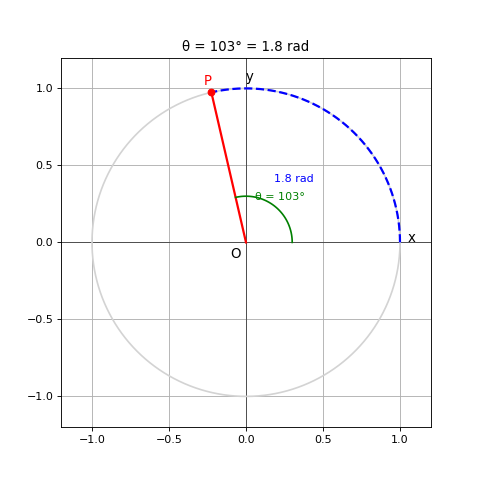

interactive(children=(IntSlider(value=0, description='Hoek θ (°)', max=360), Output()), _dom_classes=('widget-…

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import IntSlider, interact
from matplotlib.lines import Line2D

# Zet de interactive back-end aan
%matplotlib widget

# Voorbereiding van figuur en plots
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_title("Eenheidscirkel met hoek θ")
ax.grid(True)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)

# Eenheidscirkel
circle_theta = np.linspace(0, 2 * np.pi, 1000)
circle_x = np.cos(circle_theta)
circle_y = np.sin(circle_theta)
ax.plot(circle_x, circle_y, 'lightgray')

# Lijnen en objecten die we gaan updaten
line_OP, = ax.plot([], [], 'r-', linewidth=2)
arc_line, = ax.plot([], [], 'b--', linewidth=2)
angle_arc, = ax.plot([], [], 'g-', linewidth=1.5)
point_P, = ax.plot([], [], 'ro')

# Teksten die we updaten
text_P = ax.text(0, 0, '', fontsize=12, color='red')
text_deg = ax.text(0, 0, '', fontsize=10, color='green', ha='center')
text_rad = ax.text(0, 0, '', fontsize=10, color='blue', ha='center')

# Extra vaste labels
ax.text(1.05, 0, 'x', fontsize=12)
ax.text(0, 1.05, 'y', fontsize=12)
ax.text(-0.1, -0.1, 'O', fontsize=12)

# Updatefunctie
def update(theta_deg):
    theta_rad = np.radians(theta_deg)
    x = np.cos(theta_rad)
    y = np.sin(theta_rad)

    # Update lijn OP
    line_OP.set_data([0, x], [0, y])

    # Update boog
    arc_theta = np.linspace(0, theta_rad, 300)
    arc_line.set_data(np.cos(arc_theta), np.sin(arc_theta))

    # Hoekboogje
    angle_arc_theta = np.linspace(0, theta_rad, 100)
    angle_arc_r = 0.3
    angle_arc.set_data(angle_arc_r * np.cos(angle_arc_theta),
                       angle_arc_r * np.sin(angle_arc_theta))

    # Punt P
    point_P.set_data([x], [y])
    text_P.set_position((x + 0.05 * np.sign(x), y + 0.05 * np.sign(y)))
    text_P.set_text("P")

    # Hoeklabels
    text_deg.set_position((0.35 * np.cos(theta_rad / 2), 0.35 * np.sin(theta_rad / 2)))
    text_deg.set_text(f"θ = {theta_deg}°")

    text_rad.set_position((0.5 * np.cos(theta_rad / 2), 0.5 * np.sin(theta_rad / 2)))
    text_rad.set_text(f"{round(theta_rad, 2)} rad")

    # Titel
    ax.set_title(f"θ = {theta_deg}° = {round(theta_rad, 2)} rad")

    fig.canvas.draw_idle()

# Interactieve slider
interact(update, theta_deg=IntSlider(min=0, max=360, step=1, value=0, description="Hoek θ (°)"));


## 2.2 Omrekenen van graden en radialen

Rekenen met graden en radialen:
We hebben dus gezien dat je radialen kan berekenen met graden C=(θ/(360°))2π.  Omdat het eigenlijk een verhouding is kunnen we ook zeggen dat;
θ_rad=(π/(180°)) θ_deg
En de verhouding kan je ook omdraaien; 
θ_deg=((180°)/π) θ_rad
Dus 1 rad zou dan gelijk moeten zijn aan 57,3°. Mochten verhoudingen toch een beetje lastig zijn kan je ook gebruik maken van een verhoudingstabel;
Hoek 	Hele cirkel	Cirkel gedeelte
θ (graden)	360°	90°
θ (radialen)	2π	θ

Je kan de gewenste hoek o.a. met een kruistabel berekenen;
360°∙θ=2π∙90° wat θ=1/4 π geeft.


# 3. De eenheidscirkel en goniometrische functies

Als we een kijkje nemen op de eenheidscirkel kun je dus voor een bepaalde hoek θ op een punt (positie) P(x,y) staan. Dan kan je je voorstellen dat het interessant is om te berekenen met de hoek θ waar je staat op de eenheidscirkel. Maar hoe kunnen we het x-coordinaat en y-coordinaat beschrijven als functie van de hoek θ? Als we kijken in het onderstaande figuur zien we dat de afstand tussen P en de x-as het y-coördinaat voorstelt en de afstand tussen P en de y-as het x-coördinaat voorstelt. Dit vormt een rechte driehoek waar we SOS, CAS, TOA op kunnen loslaten;
SOS; sin⁡(θ)=y/1
CAS; cos⁡(θ)=x/1
TOA; tan⁡(θ)=y/x
Wat we dus hebben geleerd is dat het punt P(x,y) berekent kan worden met 
x=cos⁡(θ)
y=sin⁡(θ)

<IPython.core.display.Javascript object>


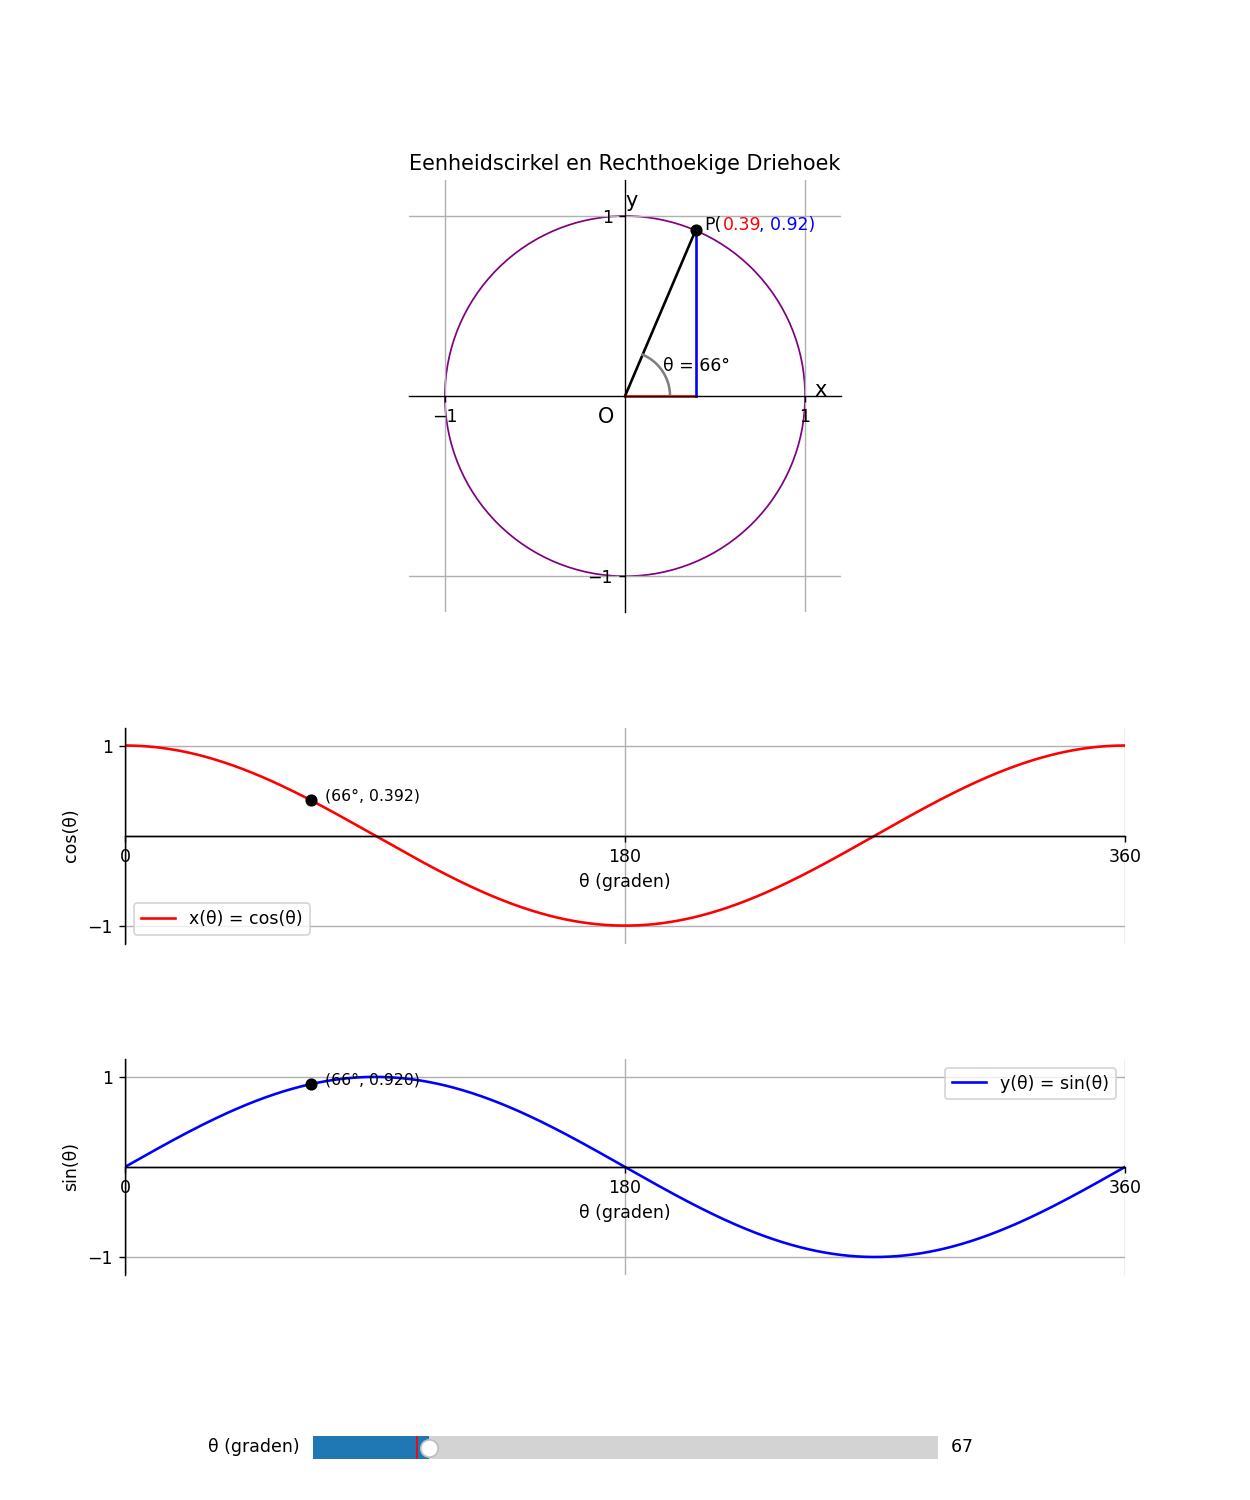

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import matplotlib.gridspec as gridspec

# Initial angle
theta_init = 60

# Set up the figure and subplots
fig = plt.figure(figsize=(10, 12))
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1])
ax_circle = plt.subplot(gs[0])
ax_cos = plt.subplot(gs[1])
ax_sin = plt.subplot(gs[2])
plt.subplots_adjust(left=0.1, bottom=0.15, hspace=0.4)

# Eenheidscirkel
circle = plt.Circle((0, 0), 1, color='purple', fill=False)
ax_circle.add_artist(circle)
ax_circle.set_xlim(-1.2, 1.2)
ax_circle.set_ylim(-1.2, 1.2)
ax_circle.set_aspect('equal')
ax_circle.grid(True)
ax_circle.set_title("Eenheidscirkel en Rechthoekige Driehoek")

# Assen door oorsprong
ax_circle.spines['left'].set_position('zero')
ax_circle.spines['bottom'].set_position('zero')
ax_circle.spines['right'].set_color('none')
ax_circle.spines['top'].set_color('none')
ax_circle.xaxis.set_ticks([-1, 1])
ax_circle.yaxis.set_ticks([-1, 1])

# Labels
ax_circle.text(1.05, 0, 'x', fontsize=12)
ax_circle.text(0, 1.05, 'y', fontsize=12)
ax_circle.text(-0.15, -0.15, 'O', fontsize=12)

# Cos/Sin-functies
theta_deg = np.linspace(0, 360, 1000)
theta_rad = np.deg2rad(theta_deg)
cos_vals = np.cos(theta_rad)
sin_vals = np.sin(theta_rad)

ax_cos.plot(theta_deg, cos_vals, label='x(θ) = cos(θ)', color='red')
ax_sin.plot(theta_deg, sin_vals, label='y(θ) = sin(θ)', color='blue')

for ax, ylabel in zip([ax_cos, ax_sin], ['cos(θ)', 'sin(θ)']):
    ax.set_xlim(0, 360)
    ax.set_ylim(-1.2, 1.2)
    ax.grid(True)
    ax.axhline(0, color='black', linewidth=0.8)
    ax.axvline(0, color='black', linewidth=0.8)
    ax.set_ylabel(ylabel)
    ax.set_xlabel('θ (graden)')
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xticks([0, 180, 360])
    ax.set_yticks([-1, 1])

ax_cos.legend()
ax_sin.legend()

# Beginpunt
theta_rad_init = np.deg2rad(theta_init)
x = np.cos(theta_rad_init)
y = np.sin(theta_rad_init)

line_radius, = ax_circle.plot([0, x], [0, y], color='black')
line_horizontal, = ax_circle.plot([0, x], [0, 0], color='red')
line_vertical, = ax_circle.plot([x, x], [0, y], color='blue')
point_p, = ax_circle.plot(x, y, 'ko')
text_p_label = ax_circle.text(x + 0.05, y, f'P(', fontsize=10)
text_p_x = ax_circle.text(x + 0.15, y, f'{x:.2f}', fontsize=10, color='red')
text_p_y = ax_circle.text(x + 0.35, y, f', {y:.2f})', fontsize=10, color='blue')



# Boogje voor hoek
arc_radius = 0.25
arc_angle = np.linspace(0, theta_rad_init, 100)
arc_x = arc_radius * np.cos(arc_angle)
arc_y = arc_radius * np.sin(arc_angle)
arc_line, = ax_circle.plot(arc_x, arc_y, 'gray')
arc_text = ax_circle.text(
    arc_radius * np.cos(theta_rad_init / 2),
    arc_radius * np.sin(theta_rad_init / 2),
    f'θ = {theta_init}°',
    fontsize=10
)

# Cos/Sin-punten
cos_point, = ax_cos.plot(theta_init, np.cos(theta_rad_init), 'ko')
cos_text = ax_cos.text(theta_init + 5, np.cos(theta_rad_init), f'({theta_init}°, {np.cos(theta_rad_init):.3f})', fontsize=9)
sin_point, = ax_sin.plot(theta_init, np.sin(theta_rad_init), 'ko')
sin_text = ax_sin.text(theta_init + 5, np.sin(theta_rad_init), f'({theta_init}°, {np.sin(theta_rad_init):.3f})', fontsize=9)

# Slider
ax_slider = plt.axes([0.25, 0.02, 0.5, 0.03])
slider = Slider(ax_slider, 'θ (graden)', 0, 360, valinit=theta_init)

# Update functie
def update(val):
    theta = slider.val
    theta_rad = np.deg2rad(theta)
    x = np.cos(theta_rad)
    y = np.sin(theta_rad)

    # Driehoek
    line_radius.set_data([0, x], [0, y])
    line_horizontal.set_data([0, x], [0, 0])
    line_vertical.set_data([x, x], [0, y])
    point_p.set_data(x, y)
    text_p_label.set_position((x + 0.05, y))
    text_p_x.set_position((x + 0.15, y))
    text_p_y.set_position((x + 0.35, y))

    text_p_x.set_text(f'{x:.2f}')
    text_p_y.set_text(f', {y:.2f})')



    # Hoekboog
    arc_angle = np.linspace(0, theta_rad, 100)
    arc_x = arc_radius * np.cos(arc_angle)
    arc_y = arc_radius * np.sin(arc_angle)
    arc_line.set_data(arc_x, arc_y)
    arc_text.set_position((arc_radius * np.cos(theta_rad / 2),
                           arc_radius * np.sin(theta_rad / 2)))
    arc_text.set_text(f'θ = {int(theta)}°')

    # Cos/Sin-punten
    cos_point.set_data(theta, np.cos(theta_rad))
    cos_text.set_position((theta + 5, np.cos(theta_rad)))
    cos_text.set_text(f'({int(theta)}°, {np.cos(theta_rad):.3f})')

    sin_point.set_data(theta, np.sin(theta_rad))
    sin_text.set_position((theta + 5, np.sin(theta_rad)))
    sin_text.set_text(f'({int(theta)}°, {np.sin(theta_rad):.3f})')

    fig.canvas.draw_idle()

slider.on_changed(update)
plt.show()

Hierin is de rode en blauwe functie:
x=cos⁡(θ)
y=sin⁡(θ)
Als we nou met onze vinger de eenheid cirkel volgen dan merken we dat de grafiek overeen komt met onze verwachting
Kwartcirkel	Coördinaat P(x,y)
1e kwadrant	(+,+)
2e kwadrant	(-,+)
3e kwadrant	(-,-)
4e kwadrant	(+,-)


# 4. Eigenschappen van periodieke functies en koppeling aan functievoorschrift

## 4.1Begrippen:

Vanuit de eenheidscirkel hebben we dus gezien dat de goniometrische functies van driehoeken eruit zien als golven. Maar wat zijn nou eigenschappen van een golf? De golf beweegt op en neer rond een evenwichtsstand. Dit is eigenlijk het gemiddelde waarde tussen piek en dal. Dit kunnen we dus berekenen door (y_max+y_min)/2. Dan heeft deze golf ook een bepaalde hoogte, de amplitude. Dit is de afstand tussen de piek en de evenwichtstand, wat we kunnen berekenen met y_max-y_evenwicht. De amplitude is ook de helft van de afstand tussen piek en dal dus kunnen we ook berekenen; (y_max-y_min)/2. Nu we naar de hoogte hebben gekeken hebben we ook de breedte. Een hele golf beweging noemen we een periode T. Het is dus de afstand van 1 hele golf beweging. Deze zou je kunnen berekenen door de afstand tussen de toppen x_max2-x_max1, de afstand tussen de dalen x_min2-x_min1of de afstand tussen het op (afstand tussen snijpunten evenwichtstand) en neer gaan van de beweging ofwel; 2(x_s2-x_s1). We weten dat de sinus start in de evenwichten en omhoog stijgt en de cosinus start in de top. Dit startpunt kunnen we aflezen door de afstand te pakken vanaf de y-as tot de karakteristiek van de bijbehorende grafiek.


<IPython.core.display.Javascript object>


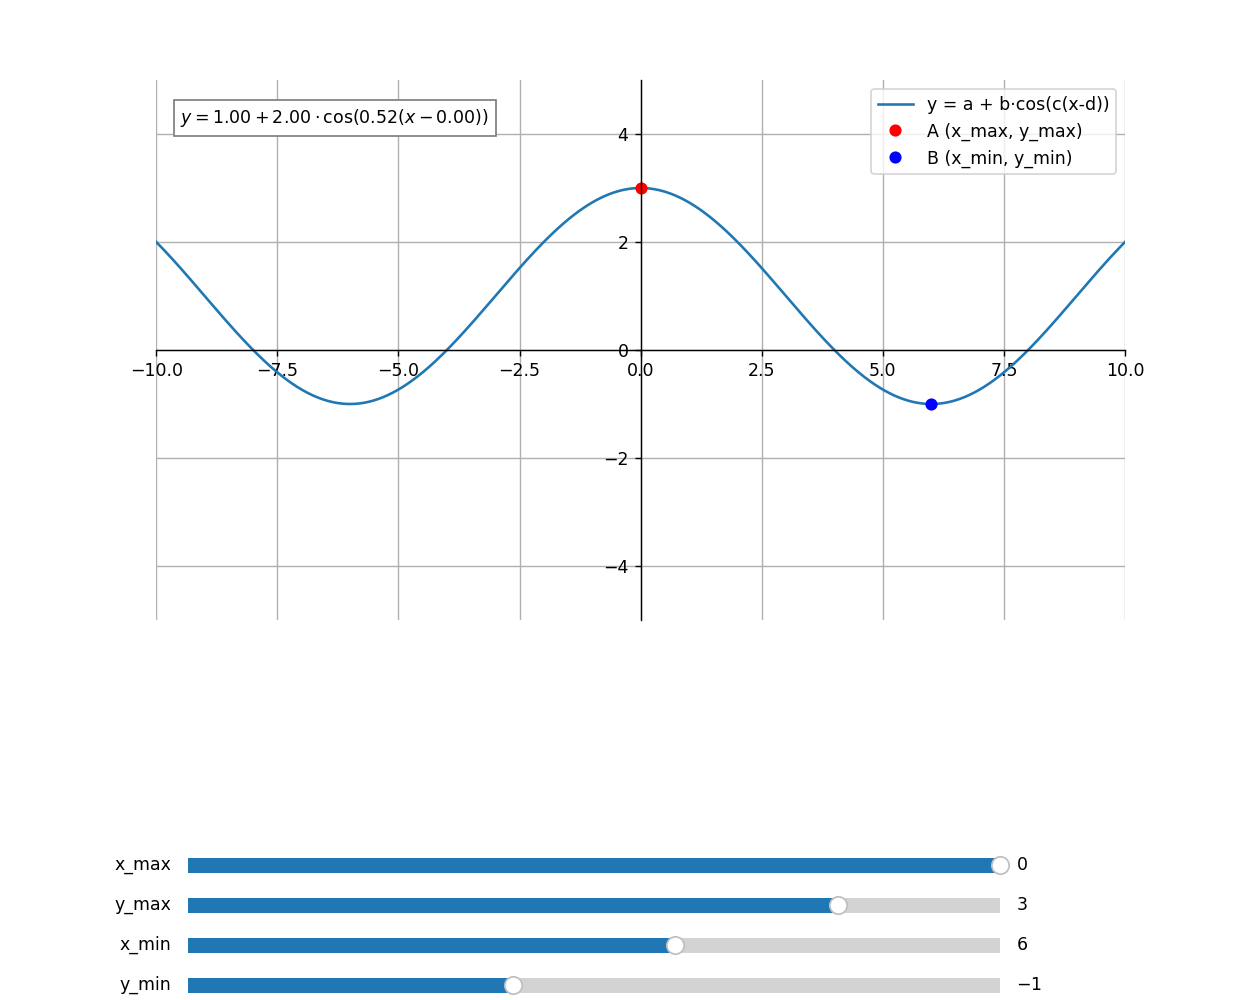

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

def bereken_parameters(x_max, y_max, x_min, y_min):
    a = (y_max + y_min) / 2
    b = (y_max - y_min) / 2
    c = np.pi / abs(x_max - x_min)
    d = x_max
    return a, b, c, d

# Maak figuur met meer ruimte onderaan
fig, ax = plt.subplots(figsize=(10, 8))
plt.subplots_adjust(bottom=0.38, top=0.92)

x_vals = np.linspace(-10, 10, 1000)
ax.set_xlim(-10, 10)
ax.set_ylim(-5, 5)
ax.grid(True)

# Assen door oorsprong
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# Lijnen, punten, formules
line, = ax.plot([], [], label='y = a + b·cos(c(x-d))')
point_A, = ax.plot([], [], 'ro', label='A (x_max, y_max)')
point_B, = ax.plot([], [], 'bo', label='B (x_min, y_min)')
text_formula = ax.text(-9.5, 4.2, '', fontsize=10, bbox=dict(facecolor='white', edgecolor='gray'))
ax.legend(loc='upper right')

# Teksten met formules onder grafiek (fig-coördinaten, niet ax)
latex_text_a = fig.text(0.1, 0.30, '', fontsize=12, color='black')
latex_text_b = fig.text(0.1, 0.26, '', fontsize=12, color='black')
latex_text_c = fig.text(0.1, 0.22, '', fontsize=12, color='black')
latex_text_d = fig.text(0.1, 0.18, '', fontsize=12, color='black')

# Slider assen (onder de formules)
ax_xmax = plt.axes([0.15, 0.12, 0.65, 0.03])
ax_ymax = plt.axes([0.15, 0.08, 0.65, 0.03])
ax_xmin = plt.axes([0.15, 0.04, 0.65, 0.03])
ax_ymin = plt.axes([0.15, 0.00, 0.65, 0.03])

slider_xmax = Slider(ax_xmax, 'x_max', -10, 0, valinit=2)
slider_ymax = Slider(ax_ymax, 'y_max', -5, 5, valinit=3)
slider_xmin = Slider(ax_xmin, 'x_min', 0, 10, valinit=6)
slider_ymin = Slider(ax_ymin, 'y_min', -5, 5, valinit=-1)

def update(val):
    x_max = slider_xmax.val
    y_max = slider_ymax.val
    x_min = slider_xmin.val
    y_min = slider_ymin.val

    a, b, c, d = bereken_parameters(x_max, y_max, x_min, y_min)
    y_vals = a + b * np.cos(c * (x_vals - d))

    line.set_data(x_vals, y_vals)
    point_A.set_data([x_max], [y_max])
    point_B.set_data([x_min], [y_min])

    text_formula.set_text(rf'$y = {a:.2f} + {b:.2f} \cdot \cos({c:.2f}(x - {d:.2f}))$')

    latex_text_a.set_text(rf"$a = \frac{{y_{{\max}} + y_{{\min}}}}{2} = \frac{{{y_max:.2f} + {y_min:.2f}}}{2} = {a:.2f}$")
    latex_text_b.set_text(rf"$b = \frac{{y_{{\max}} - y_{{\min}}}}{2} = \frac{{{y_max:.2f} - {y_min:.2f}}}{2} = {b:.2f}$")
    latex_text_c.set_text(rf"$c = \frac{{\pi}}{{|x_{{\max}} - x_{{\min}}|}} = \frac{{\pi}}{{|{x_max:.2f} - {x_min:.2f}|}} = {c:.2f}$")
    latex_text_d.set_text(rf"$d = x_{{\max}} = {d:.2f}$")

    fig.canvas.draw_idle()

update(None)
slider_xmax.on_changed(update)
slider_ymax.on_changed(update)
slider_xmin.on_changed(update)
slider_ymin.on_changed(update)

plt.show()

## 4.2 Standaard formule

...


### 4.2.1 De evenwichtsstand; a

De evenwichtsstand is dus de gemiddelde lijn tussen de pieken en dalen. Bij de standaard grafiek ligt deze lijn op de x-as, ofwel y=0. Als we de evenwichtstand hoger of lager willen zijn moeten we een verticale translatie uitvoeren. Als we de grafiek omhoog willen schuiven met bijvoorbeeld 3 moeten we de y-coordinaten optellen met 3; f(x)-->f(x)+3. ALs we de grafiek omlaag willen schuiven met bijvoorbeeld 2 moeten we de y-coordinaten aftrekken met 2; f(x)-->f(x)-2. Dus als we y=sin(x) op een evenwichtstand van y=a willen krijgen moeten we de functie sin(x) verticaal transleren met a; a+sin(x). Het figuur hieronder laat zien hoe getransleerde grafiek a+sin(x) (blauw) ontstaat uit de de basis grafiek sin(x) (grijs).

<IPython.core.display.Javascript object>


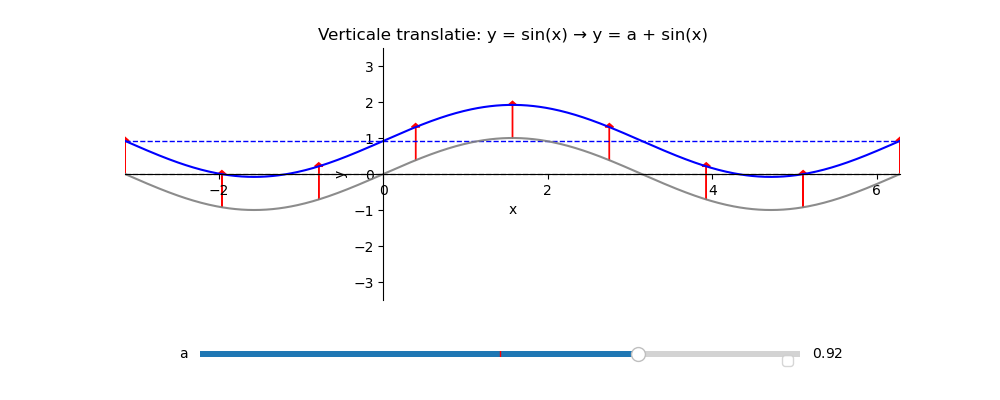

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Setup
x = np.linspace(-np.pi, 2*np.pi, 500)
a0 = 0

# Plot setup
fig, ax = plt.subplots(figsize=(10, 4))
plt.subplots_adjust(bottom=0.25)
ax.set_xlim(-np.pi, 2*np.pi)
ax.set_ylim(-3.5, 3.5)

# Assen netjes door de oorsprong
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("Verticale translatie: y = sin(x) → y = a + sin(x)")
ax.set_xlabel("x")
ax.set_ylabel("y")

# Grondlijnen tekenen
y0_line = ax.axhline(0, color='gray', linestyle='--', linewidth=1)      # y = 0 (evenwicht origineel)
y_a_line = ax.axhline(a0, color='blue', linestyle='--', linewidth=1)    # y = a (evenwicht verschoven)

# Grafieken tekenen
sin_line, = ax.plot(x, np.sin(x), color='gray', alpha=0.9, linewidth=1.5, label="y = sin(x)")
trans_line, = ax.plot(x, a0 + np.sin(x), color='blue', label="y = a + sin(x)")

# Pijlen setup
arrows = []

def draw_arrows(a):
    global arrows
    for arrow in arrows:
        arrow.remove()
    arrows = []
    for xi in np.linspace(-np.pi, 2*np.pi, 9):
        y1 = np.sin(xi)
        y2 = a + np.sin(xi)
        arrows.append(ax.arrow(xi, y1, 0, y2 - y1,
                               head_width=0.1, head_length=0.1,
                               fc='red', ec='red'))

draw_arrows(a0)

# Slider
ax_slider = plt.axes([0.2, 0.1, 0.6, 0.03])
s_a = Slider(ax_slider, 'a', -2.0, 2.0, valinit=a0)

# Update functie
def update(val):
    a = s_a.val
    trans_line.set_ydata(a + np.sin(x))
    y_a_line.set_ydata([a, a])  # Verplaats de blauwe evenwichtslijn
    draw_arrows(a)
    fig.canvas.draw_idle()

s_a.on_changed(update)
plt.legend()
plt.show()

### 4.2.2 De amplitude; b

De amplitude is dus de de hoogte van de golf. De standaard grafiek sin(x) heeft een amplitude van 1. Als ik een amplitude van 2 maak ik de waarde 2 keer zo groot. We zijn nu als het ware aan het vermenigvuldigen t.o.v. de x-as. Als ik dus een amplitude van b groot wil hebben moet ik de y-waarde b keer zo groot maken. Voor sin(x) doe ik dus een vermenigvuldiging t.o.v. de x-as met b en krijg ik b*sin(x).


<IPython.core.display.Javascript object>


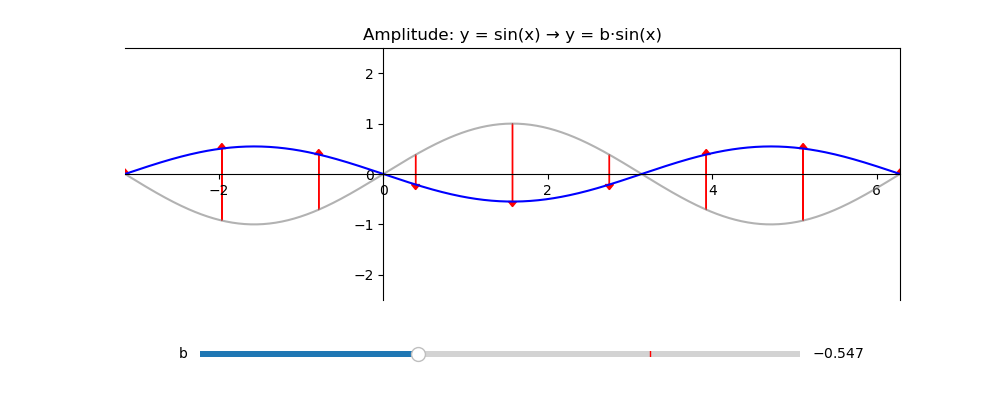

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

x = np.linspace(-np.pi, 2*np.pi, 500)
b0 = 1

fig, ax = plt.subplots(figsize=(10, 4))
plt.subplots_adjust(bottom=0.25)
ax.set_xlim(-np.pi, 2*np.pi)
ax.set_ylim(-2.5, 2.5)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.set_title("Amplitude: y = sin(x) → y = b·sin(x)")

sin_line, = ax.plot(x, np.sin(x), color='gray', alpha=0.6)
trans_line, = ax.plot(x, b0 * np.sin(x), color='blue')
arrows = []

def draw_arrows(b):
    global arrows
    for arrow in arrows:
        arrow.remove()
    arrows = []
    for xi in np.linspace(-np.pi, 2*np.pi, 9):
        y1 = np.sin(xi)
        y2 = b * np.sin(xi)
        arrows.append(ax.arrow(xi, y1, 0, y2 - y1, head_width=0.1, head_length=0.1, fc='red', ec='red'))

draw_arrows(b0)

ax_b = plt.axes([0.2, 0.1, 0.6, 0.03])
s_b = Slider(ax_b, 'b', -2, 2, valinit=b0)

def update(val):
    b = s_b.val
    trans_line.set_ydata(b * np.sin(x))
    draw_arrows(b)
    fig.canvas.draw_idle()

s_b.on_changed(update)
plt.show()


### 4.2.3 De hoeksnelheid; c

De grafiek heeft ook een periode. Bij de standaard grafiek is dit 2 pi. Stel dat ik een periode wil van 1 moet ik dus de x-waarde verkleinen met 2pi ofwel vergrooten met (1/2pi). Dit noemen we weer vermenigvuldigen t.o.v. de y-as. De waarde van x worden vermenigvuligd t.o.v. d y-as. Voor een sinus met periode 1 doen we dus sin(x)--> verm t.o.v. de y-as met 1/2pi en krijgen we sin(1/(1/2pi) *x) ofwel sin(2pi x). Dit is logisch, bij V t.o.v. de x-as vermenigvuldigen we de vergroting met y, en het tegeonversgesteld is dus V t.o.v. de y as. Dus dan Delen we de vergroting met x. Stel dat ik nou een periode T wil voor de standaard sinus grafiek. De vergrotingsfactor=nieuw/oud=T/2pi. Bij de transformatie krijgen we sin(x)--> V t.o.v.de y-as met T/2pi --> sin(x/(T/2pi))=sin((2pi/T)x)=sin(cx) met c=2pi/T. Dit principe is zichtbaar in het figuur hieronder. C is dus de volledige hoek per periode, daarom noemen we dat de hoeksnelheid.

<IPython.core.display.Javascript object>


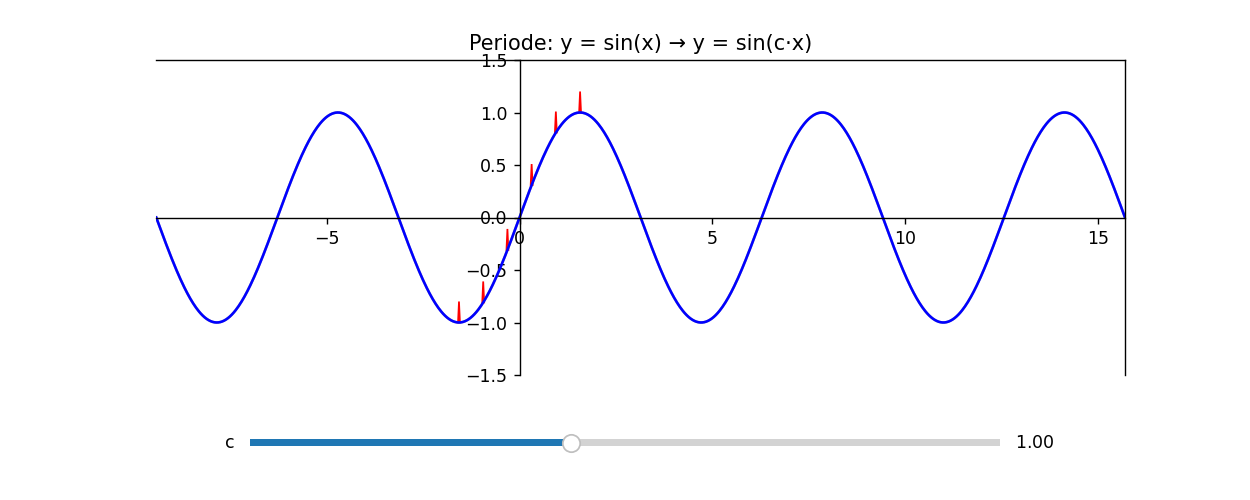

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

x = np.linspace(-3*np.pi, 5*np.pi, 1000)
c0 = 1

fig, ax = plt.subplots(figsize=(10, 4))
plt.subplots_adjust(bottom=0.25)
ax.set_xlim(-3*np.pi, 5*np.pi)
ax.set_ylim(-1.5, 1.5)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.set_title("Periode: y = sin(x) → y = sin(c·x)")

sin_line, = ax.plot(x, np.sin(x), color='gray', alpha=0.6)
trans_line, = ax.plot(x, np.sin(c0 * x), color='blue')
arrows = []

def draw_arrows(c):
    global arrows
    for arrow in arrows:
        arrow.remove()
    arrows = []
    x_samples = np.linspace(-0.5*np.pi, 0.5*np.pi, 6)
    for xi in x_samples:
        y = np.sin(xi)
        x_orig = xi / c
        dx = xi - x_orig
        arrows.append(ax.arrow(x_orig, y, dx, 0, head_width=0.05, head_length=0.2, fc='red', ec='red'))

draw_arrows(c0)

ax_c = plt.axes([0.2, 0.1, 0.6, 0.03])
s_c = Slider(ax_c, 'c', 0.25, 2, valinit=c0)

def update(val):
    c = s_c.val
    trans_line.set_ydata(np.sin(c * x))
    draw_arrows(c)
    fig.canvas.draw_idle()

s_c.on_changed(update)
plt.show()


### 4.2.4 De faseverschuiving; d

Als laatst hebben we de verplaatsing van het startpunt. Wanneer het startpunt wordt verschoven wordt in de eenheidscirkel de starthoek verschoven. De grafiek is periodiek, een andere startpunt is dus een andere fase. Daarom noemen we het een faseverschuiving. Stel dat ik op x=3 het start punt wil hebben denk ik; het starpunt normaal staat op y=sin(0), als ik die y waarde voor een andere x wil hebben moet ik dus hetzelfde tussen de haakjes hebben voor x=3. voor y=sin(x-3) is dat het geval want f(3)=sin(3-3)=sin(0) komen we dus op hetzelfde start punt uit. Horizontale translatie is weer het tegenovergestelde van verticale translatie. I.p.v. bij y de waarde op te tellen gaan we nu bij x de waarde aftrekken.

<IPython.core.display.Javascript object>


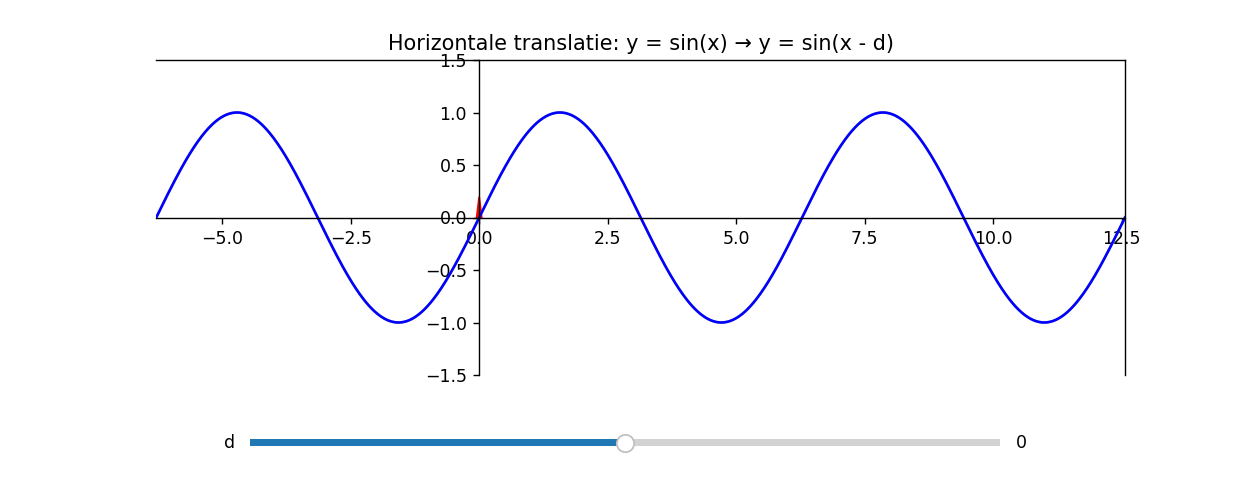

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

x = np.linspace(-2*np.pi, 4*np.pi, 1000)
d0 = 0

fig, ax = plt.subplots(figsize=(10, 4))
plt.subplots_adjust(bottom=0.25)
ax.set_xlim(-2*np.pi, 4*np.pi)
ax.set_ylim(-1.5, 1.5)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.set_title("Horizontale translatie: y = sin(x) → y = sin(x - d)")

sin_line, = ax.plot(x, np.sin(x), color='gray', alpha=0.6)
trans_line, = ax.plot(x, np.sin(x - d0), color='blue')

# Beginpijl
arrow = ax.arrow(0, 0, d0, 0, head_width=0.1, head_length=0.2, fc='red', ec='red')

ax_d = plt.axes([0.2, 0.1, 0.6, 0.03])
s_d = Slider(ax_d, 'd', -5, 5, valinit=d0)

def update(val):
    global arrow
    d = s_d.val
    trans_line.set_ydata(np.sin(x - d))
    arrow.remove()
    arrow = ax.arrow(0, 0, d, 0, head_width=0.1, head_length=0.2, fc='red', ec='red')
    fig.canvas.draw_idle()

s_d.on_changed(update)
plt.show()


# 5. Oplossen van goniometrische vergelijkingen en exacte waarden van sin(θ) en cos(θ)

## 5.1 Oplossen sin(x)=c

Stel dat je de vergelijking sin(x)=1/2 moet oplossen. ALs we denken dat naar de eenheidscirkel moeten vertalen is dat dus y=sin(theta) stellen we dus de vraag: voor welke hoek theta is de y-coordinaat gelijk aan 1/2. voor het oplossen van sin(theta)=1/2 kunnen we via de balans methode: theta=asin(1/2) verkrijgen wat ons 30 graden oplevert. Echter als we naar de grafiek hieronder kijken zien we dat 30 graden niet de enige oplossing is. Voor theta is 150 graden hebben we ook een y-coordinaat van 1/2. 

Dit kunnen we vergelijken met het oplossen van x^2=9. Bij het gebruiken van de balans methode komen we op x=sqrt(9)=3 maar x=-3 is ook een oplossing dus bewachten we de regel voor x^2=c; x_1=sqrt(c) en x_2=-x_1.

Laten we een trucje ook vinden voor sin(x)=1/2. We weten dat het eerste snijpunt dus x_1=asin(1/2)=30 is. Als we goed naar de grafiek kijken zien we dat de grafiek rechts eigenlijk het spiegelbeeld is om de y-as. Dit betekend dat de stompe hoek achter theta_1 eigenlijk hoek theta_2 is van de rechter figuur. De hoeken bij elkaar vormen een halve cirkel ofwel; theta_1 + theta_2 =180. wat betekend dat theta_2=180-theta_1. Ga dit in het figuur na voor verschillende waardes van c. Dus voor het oplossen van sin(x)=c berekenen we x_1=asin(c) en x_2=pi-x_1 (180 graden is pi radialen). 

<IPython.core.display.Javascript object>


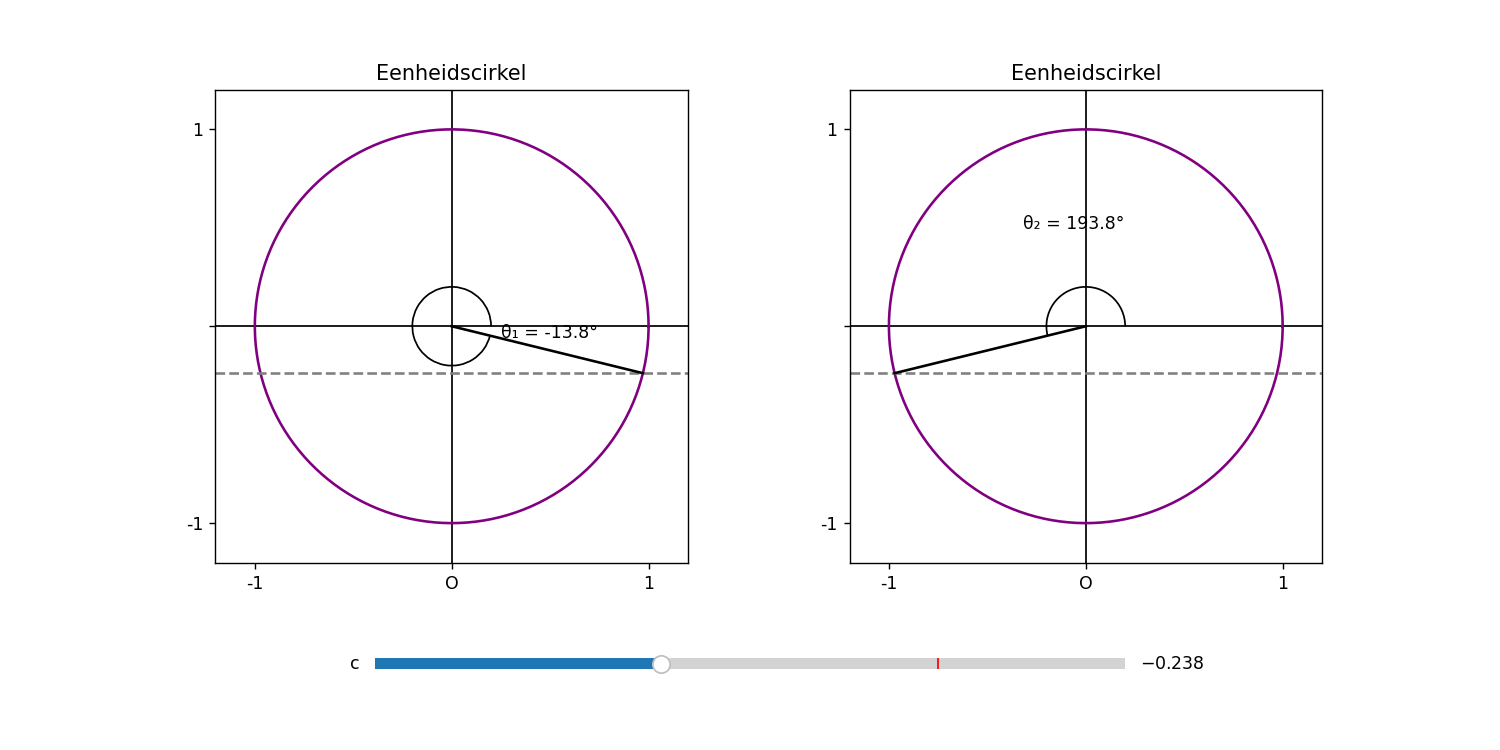

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from matplotlib.widgets import Slider

# Set up the figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plt.subplots_adjust(bottom=0.25)

# Gemeenschappelijke instellingen
def configure_axes(ax):
    ax.set_aspect('equal')
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.axhline(0, color='black', lw=1)
    ax.axvline(0, color='black', lw=1)
    ax.set_xticks([-1, 0, 1])
    ax.set_yticks([-1, 0, 1])
    ax.set_xticklabels(['-1', 'O', '1'])
    ax.set_yticklabels(['-1', '', '1'])
    ax.set_title("Eenheidscirkel")

for ax in (ax1, ax2):
    configure_axes(ax)

# Tekenfunctie
def draw_unit_circles(c):
    ax1.clear()
    ax2.clear()
    for ax in (ax1, ax2):
        configure_axes(ax)
        # Paarse eenheidscirkel
        ax.plot(np.cos(np.linspace(0, 2*np.pi, 300)), np.sin(np.linspace(0, 2*np.pi, 300)), color='purple')
        # Lijn y = c
        ax.axhline(c, color='gray', linestyle='--')

    # Hoek 1 (links)
    theta1 = np.arcsin(c)
    x1, y1 = np.cos(theta1), np.sin(theta1)
    ax1.plot([0, x1], [0, y1], color='black')

    # Boog (links)
    if c >= 0:
        start1, end1 = 0, np.degrees(theta1)
    else:
        start1, end1 = 0, np.degrees(theta1)
    arc1 = Arc((0, 0), 0.4, 0.4, angle=0, theta1=start1, theta2=end1, color='black')
    ax1.add_patch(arc1)

    # Hoeklabel
    label_angle1 = theta1 / 2 if c >= 0 else theta1 / 2
    ax1.text(0.5 * np.cos(label_angle1), 0.5 * np.sin(label_angle1), f'θ₁ = {np.degrees(theta1):.1f}°', fontsize=10, ha='center')

    # Hoek 2 (rechts)
    theta2 = np.pi - theta1
    x2, y2 = np.cos(theta2), np.sin(theta2)
    ax2.plot([0, x2], [0, y2], color='black')

    # Boog (rechts)
    arc2 = Arc((0, 0), 0.4, 0.4, angle=0, theta1=0, theta2=np.degrees(theta2), color='black')
    ax2.add_patch(arc2)

    # Hoeklabel
    label_angle2 = theta2 / 2
    ax2.text(0.5 * np.cos(label_angle2), 0.5 * np.sin(label_angle2), f'θ₂ = {np.degrees(theta2):.1f}°', fontsize=10, ha='center')

    fig.canvas.draw_idle()

# Beginwaarde
initial_c = 0.5
draw_unit_circles(initial_c)

# Slider voor c
ax_c = plt.axes([0.25, 0.1, 0.5, 0.03])
slider_c = Slider(ax_c, 'c', -1.0, 1.0, valinit=initial_c)

def update(val):
    draw_unit_circles(slider_c.val)

slider_c.on_changed(update)
plt.show()


Als we nu grafisch sin(x)=1/2 weergeven kunnen we weer bewijzen dat sin(x)=sin(pi-x). In x=1/2 is een symetrie lijn afgebeeld. Daardoor is de afstand van oorsprong tot x_1 dezefde afstand als pi tot x_2. We verkrijgen dus dat x_2 dan berekent kan worden door pi-x_1. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


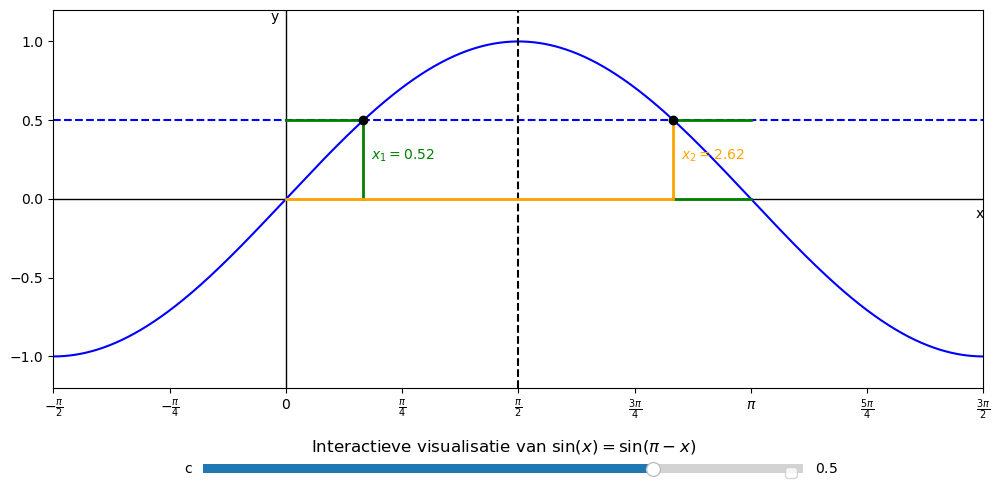

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Setup x-range
x_vals = np.linspace(-0.5 * np.pi, 1.5 * np.pi, 1000)
y_vals = np.sin(x_vals)

# Plot setup
fig, ax = plt.subplots(figsize=(12, 6))
plt.subplots_adjust(bottom=0.25)
ax.set_xlim(-0.5 * np.pi, 1.5 * np.pi)
ax.set_ylim(-1.2, 1.2)
ax.axhline(0, color='black', lw=1)
ax.axvline(0, color='black', lw=1)
ax.set_xticks([n * np.pi / 4 for n in range(-2, 7)])
ax.set_xticklabels(
    [r"$-\frac{\pi}{2}$", r"$-\frac{\pi}{4}$", "0", r"$\frac{\pi}{4}$", r"$\frac{\pi}{2}$",
     r"$\frac{3\pi}{4}$", r"$\pi$", r"$\frac{5\pi}{4}$", r"$\frac{3\pi}{2}$"]
)
ax.set_yticks([-1, -0.5, 0, 0.5, 1])
ax.text(1.5 * np.pi, -0.05, 'x', ha='right', va='top')
ax.text(-0.05, 1.2, 'y', ha='right', va='top')

# Sinuslijn
sin_line, = ax.plot(x_vals, y_vals, color='blue', label=r'$\sin(x)$')
horizontal_c = ax.axhline(0.5, color='blue', linestyle='--', label=r'$y = c$')
sym_line = ax.axvline(np.pi / 2, color='black', linestyle='--', label=r'$x = \frac{\pi}{2}$')

# Interactieve lijnen en tekst
vline_green, = ax.plot([], [], color='green', lw=2)
vline_orange, = ax.plot([], [], color='orange', lw=2)
hline_green1, = ax.plot([], [], color='green', lw=2)
hline_green3, = ax.plot([], [], color='green', lw=2)
hline_green2, = ax.plot([], [], color='green', lw=2)
hline_orange, = ax.plot([], [], color='orange', lw=2)
dot1, = ax.plot([], [], 'ko')
dot2, = ax.plot([], [], 'ko')
text_x1 = ax.text(0, 0, '', color='green', ha='left')
text_x2 = ax.text(0, 0, '', color='orange', ha='left')

# Slider
ax_slider = plt.axes([0.25, 0.1, 0.5, 0.03])
slider_c = Slider(ax_slider, 'c', -1.0, 1.0, valinit=0.5)

def update(val):
    c = slider_c.val
    horizontal_c.set_ydata(c)

    # Skip invalid arcsin
    if abs(c) > 1:
        return

    theta = np.arcsin(c)
    x1 = theta
    x2 = np.pi - theta

    # Verticale lijnen
    vline_green.set_data([x1, x1], [0, c])
    vline_orange.set_data([x2, x2], [0, c])

    # Horizontale lijnen
    hline_green1.set_data([0, x1], [c, c])                # y = c van 0 tot x1 (groen)
    hline_green3.set_data([x2, np.pi], [c, c])                # y = c van x2 tot pi (groen)
    hline_green2.set_data([x2, np.pi], [0, 0])            # y = 0 van x2 tot pi (groen)
    hline_orange.set_data([0, x2], [0, 0])                # y = 0 van 0 tot x2 (oranje)

    # Snijpunten
    dot1.set_data([x1], [c])
    dot2.set_data([x2], [c])

    # Tekst
    text_x1.set_position((x1 + 0.05, c / 2))
    text_x1.set_text(rf"$x_1 = {x1:.2f}$")

    text_x2.set_position((x2 + 0.05, c / 2))
    text_x2.set_text(rf"$x_2 = {x2:.2f}$")

    fig.canvas.draw_idle()

slider_c.on_changed(update)
update(0.5)

plt.title(r'Interactieve visualisatie van $\sin(x) = \sin(\pi - x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()


Nu si het meer dan duidelijk dat de vergelijking sin(x)=c opgelost kan worden met x_1=asin(c) en x_2=pi-asin(c). Maar als we naar de grafiek hieronder kijken zien we dat de golf steeds op een afstand van 2pi zich herhaalt. Dus alles mogelijke snijpunten kunnen we beschrijven door x_1 (k)=x_1+k*2pi en x_2 (k)= x_2+k*2pi.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


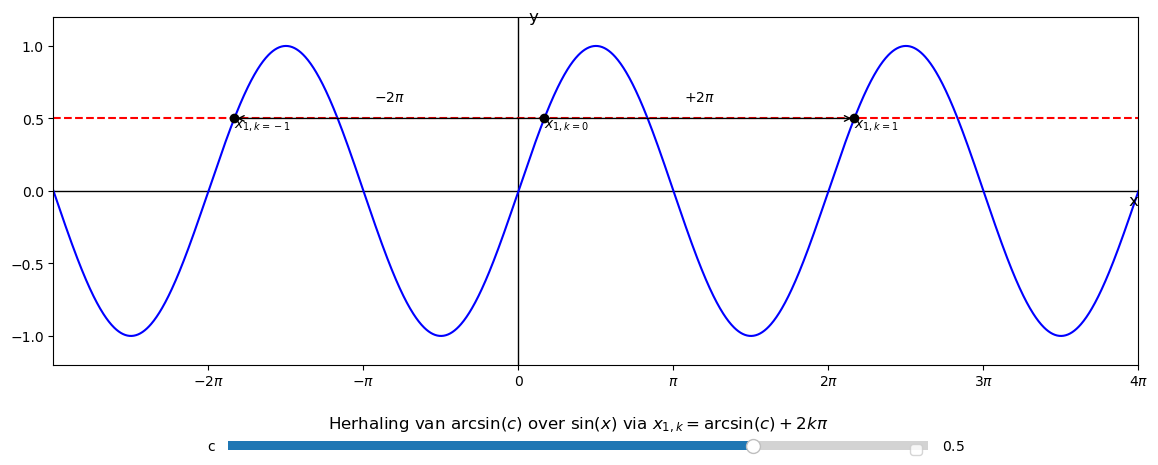

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Setup domein en waarden
x_vals = np.linspace(-3 * np.pi, 4 * np.pi, 2000)
y_vals = np.sin(x_vals)

# Setup plot
fig, ax = plt.subplots(figsize=(14, 6))
plt.subplots_adjust(bottom=0.3)
ax.set_xlim(-3 * np.pi, 4 * np.pi)
ax.set_ylim(-1.2, 1.2)
ax.axhline(0, color='black', lw=1)  # x-as
ax.axvline(0, color='black', lw=1)  # y-as
ax.text(4 * np.pi, -0.1, 'x', fontsize=12, ha='right')
ax.text(0.2, 1.15, 'y', fontsize=12, va='bottom')

# x-as labels als veelvouden van π
xticks = [n * np.pi for n in range(-2, 5)]
xticklabels = [r"$-2\pi$", r"$-\pi$", "0", r"$\pi$", r"$2\pi$", r"$3\pi$", r"$4\pi$"]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)

# Basis sin(x) plot
sin_line, = ax.plot(x_vals, y_vals, color='blue', label=r'$\sin(x)$')

# Lijn y=c (sliderwaarde)
c_line = ax.axhline(0.5, color='red', linestyle='--', label=r'$y = c$')

# Pijlen
arrow_left = ax.annotate("", xy=(0, 0), xytext=(0, 0),
                         arrowprops=dict(arrowstyle="->", color='black'))
arrow_right = ax.annotate("", xy=(0, 0), xytext=(0, 0),
                          arrowprops=dict(arrowstyle="->", color='black'))

# Tekstlabels pijlen
text_left = ax.text(0, 0, "", ha="center", va="bottom")
text_right = ax.text(0, 0, "", ha="center", va="bottom")

# Punt markers
point_main, = ax.plot([], [], 'ko')  # x_{1,k=0}
point_left, = ax.plot([], [], 'ko')  # x_{1,k=-1}
point_right, = ax.plot([], [], 'ko')  # x_{1,k=1}

# Labels bij de punten
label_main = ax.text(0, 0, "", ha="left", va="bottom")
label_left = ax.text(0, 0, "", ha="left", va="bottom")
label_right = ax.text(0, 0, "", ha="left", va="bottom")

# Slider voor c
ax_slider = plt.axes([0.25, 0.15, 0.5, 0.03])
slider_c = Slider(ax_slider, 'c', -1.0, 1.0, valinit=0.5)

def update(val):
    c = slider_c.val
    c_line.set_ydata(c)

    # Stop als arcsin ongeldig
    if abs(c) > 1:
        return

    x0 = np.arcsin(c)
    y0 = c
    x_left = x0 - 2 * np.pi
    x_right = x0 + 2 * np.pi

    # Pijlen
    arrow_left.set_position((x0, y0))
    arrow_left.xy = (x_left, y0)
    text_left.set_position(((x_left + x0) / 2, y0 + 0.1))
    text_left.set_text(r"$-2\pi$")

    arrow_right.set_position((x0, y0))
    arrow_right.xy = (x_right, y0)
    text_right.set_position(((x0 + x_right) / 2, y0 + 0.1))
    text_right.set_text(r"$+2\pi$")

    # Zwarte punten
    point_main.set_data([x0], [y0])
    point_left.set_data([x_left], [y0])
    point_right.set_data([x_right], [y0])

    # Labels bij de punten
    label_main.set_position((x0, y0 - 0.1))
    label_main.set_text(r"$x_{1,k=0}$")

    label_left.set_position((x_left, y0 - 0.1))
    label_left.set_text(r"$x_{1,k=-1}$")

    label_right.set_position((x_right, y0 - 0.1))
    label_right.set_text(r"$x_{1,k=1}$")

    fig.canvas.draw_idle()

slider_c.on_changed(update)
update(0.5)

plt.title(r"Herhaling van $\arcsin(c)$ over $\sin(x)$ via $x_{1,k} = \arcsin(c) + 2k\pi$")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


## 5.2 Oplossen cos(x)=c

Stel dat je de vergelijking cos(x)=1/2 moet oplossen. ALs we denken dat naar de eenheidscirkel moeten vertalen is dat dus x=cos(theta) stellen we dus de vraag: voor welke hoek theta is de x-coordinaat gelijk aan 1/2. voor het oplossen van cos(theta)=1/2 kunnen we via de balans methode: theta=acos(1/2) verkrijgen wat ons 3=60 graden oplevert. Echter als we naar de grafiek hieronder kijken zien we dat 60 graden niet de enige oplossing is. Voor theta is -60 graden hebben we ook een y-coordinaat van 1/2. 


Laten we net als bij sin(x)=c het verband vinden tussen x_1 en x_2. De grafiek hieronder laat zien 

<IPython.core.display.Javascript object>


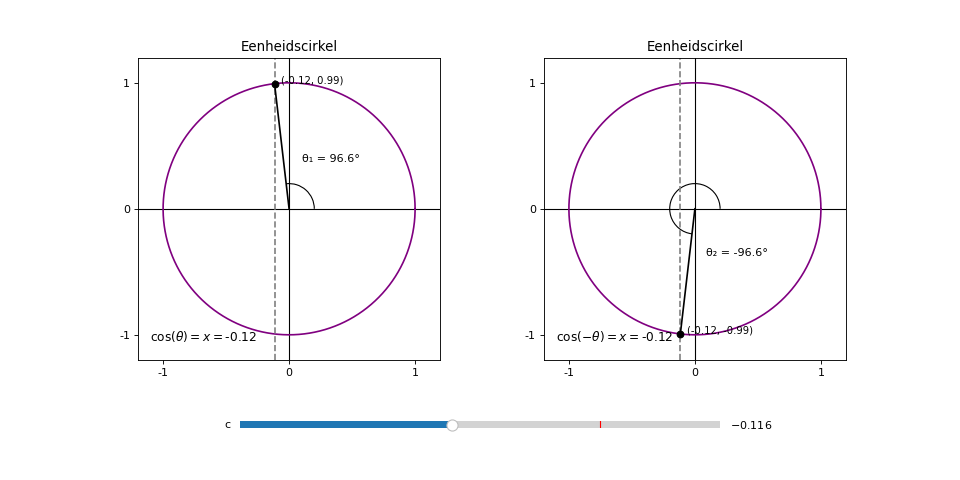

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from matplotlib.widgets import Slider

# Set up the figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plt.subplots_adjust(bottom=0.25)

# Gemeenschappelijke instellingen
def configure_axes(ax):
    ax.set_aspect('equal')
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.axhline(0, color='black', lw=1)
    ax.axvline(0, color='black', lw=1)
    ax.set_xticks([-1, 0, 1])
    ax.set_yticks([-1, 0, 1])
    ax.set_xticklabels(['-1', '0', '1'])
    ax.set_yticklabels(['-1', '0', '1'])
    ax.set_title("Eenheidscirkel")

for ax in (ax1, ax2):
    configure_axes(ax)

# Tekenfunctie
def draw_cos_proof(c):
    ax1.clear()
    ax2.clear()
    for ax in (ax1, ax2):
        configure_axes(ax)
        # Paarse eenheidscirkel
        t = np.linspace(0, 2*np.pi, 300)
        ax.plot(np.cos(t), np.sin(t), color='purple')
        # Verticale lijn x = c
        ax.axvline(c, color='gray', linestyle='--')

    # Linkerhoek θ = arccos(c)
    theta1 = np.arccos(c)
    x1, y1 = np.cos(theta1), np.sin(theta1)
    ax1.plot([0, x1], [0, y1], color='black')
    ax1.plot(x1, y1, 'ko')
    arc1 = Arc((0, 0), 0.4, 0.4, angle=0, theta1=0, theta2=np.degrees(theta1), color='black')
    ax1.add_patch(arc1)
    label_angle1 = theta1 / 2
    ax1.text(0.5 * np.cos(label_angle1), 0.5 * np.sin(label_angle1), f'θ₁ = {np.degrees(theta1):.1f}°', fontsize=10, ha='center')
    ax1.text(x1 + 0.05, y1, f'({x1:.2f}, {y1:.2f})', fontsize=9)

    # Rechterhoek θ = -arccos(c)
    theta2 = -theta1
    x2, y2 = np.cos(theta2), np.sin(theta2)
    ax2.plot([0, x2], [0, y2], color='black')
    ax2.plot(x2, y2, 'ko')
    arc2 = Arc((0, 0), 0.4, 0.4, angle=0, theta1=0, theta2=np.degrees(theta2), color='black')
    ax2.add_patch(arc2)
    label_angle2 = theta2 / 2
    ax2.text(0.5 * np.cos(label_angle2), 0.5 * np.sin(label_angle2), f'θ₂ = {np.degrees(theta2):.1f}°', fontsize=10, ha='center')
    ax2.text(x2 + 0.05, y2, f'({x2:.2f}, {y2:.2f})', fontsize=9)

    # Bewijs weergeven
    ax1.text(-1.1, -1.05, r"$\cos(\theta) = x = $" + f"{x1:.2f}", fontsize=11)
    ax2.text(-1.1, -1.05, r"$\cos(-\theta) = x = $" + f"{x2:.2f}", fontsize=11)

    fig.canvas.draw_idle()

# Beginwaarde
initial_c = 0.5
draw_cos_proof(initial_c)

# Slider voor c
ax_c = plt.axes([0.25, 0.1, 0.5, 0.03])
slider_c = Slider(ax_c, 'c', -1.0, 1.0, valinit=initial_c)

def update(val):
    draw_cos_proof(slider_c.val)

slider_c.on_changed(update)
plt.show()


Dit kunnen we ook terug zien in de vergelijking van de grafiek

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


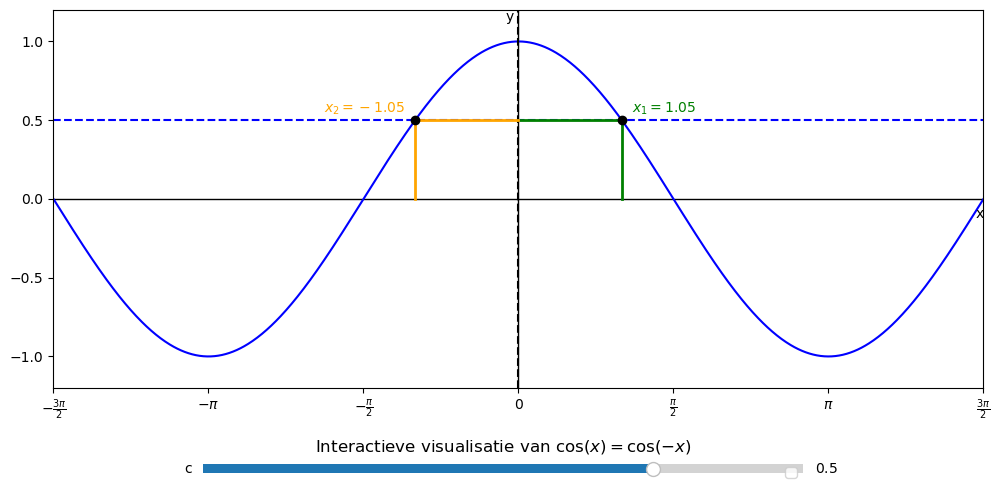

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Setup x-range
x_vals = np.linspace(-1.5 * np.pi, 1.5 * np.pi, 1000)
y_vals = np.cos(x_vals)

# Plot setup
fig, ax = plt.subplots(figsize=(12, 6))
plt.subplots_adjust(bottom=0.25)
ax.set_xlim(-1.5 * np.pi, 1.5 * np.pi)
ax.set_ylim(-1.2, 1.2)
ax.axhline(0, color='black', lw=1)
ax.axvline(0, color='black', lw=1)
ax.set_xticks([n * np.pi / 2 for n in range(-3, 4)])
ax.set_xticklabels(
    [r"$-\frac{3\pi}{2}$", r"$-\pi$", r"$-\frac{\pi}{2}$", "0", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$"]
)
ax.set_yticks([-1, -0.5, 0, 0.5, 1])
ax.text(1.5 * np.pi, -0.05, 'x', ha='right', va='top')
ax.text(-0.05, 1.2, 'y', ha='right', va='top')

# Cosinuslijn
cos_line, = ax.plot(x_vals, y_vals, color='blue', label=r'$\cos(x)$')
horizontal_c = ax.axhline(0.5, color='blue', linestyle='--', label=r'$y = c$')
sym_line = ax.axvline(0, color='black', linestyle='--', label=r'$x = 0$')

# Interactieve lijnen en punten
vline_green, = ax.plot([], [], color='green', lw=2)
vline_orange, = ax.plot([], [], color='orange', lw=2)
hline_green, = ax.plot([], [], color='green', lw=2)
hline_orange, = ax.plot([], [], color='orange', lw=2)
dot1, = ax.plot([], [], 'ko')
dot2, = ax.plot([], [], 'ko')
text_x1 = ax.text(0, 0, '', color='green', ha='left')
text_x2 = ax.text(0, 0, '', color='orange', ha='right')

# Slider
ax_slider = plt.axes([0.25, 0.1, 0.5, 0.03])
slider_c = Slider(ax_slider, 'c', -1.0, 1.0, valinit=0.5)

def update(val):
    c = slider_c.val
    horizontal_c.set_ydata(c)

    if abs(c) > 1:
        return

    theta = np.arccos(c)
    x1 = theta
    x2 = -theta

    # Verticale lijnen naar de punten
    vline_green.set_data([x1, x1], [0, c])
    vline_orange.set_data([x2, x2], [0, c])

    # Horizontale lijnen van oorsprong naar de x-waarden
    hline_green.set_data([0, x1], [c, c])
    hline_orange.set_data([x2, 0], [c, c])

    # Snijpunten
    dot1.set_data([x1], [c])
    dot2.set_data([x2], [c])

    # Tekstlabels
    text_x1.set_position((x1 + 0.1, c + 0.05))
    text_x1.set_text(rf"$x_1 = {x1:.2f}$")

    text_x2.set_position((x2 - 0.1, c + 0.05))
    text_x2.set_text(rf"$x_2 = {x2:.2f}$")

    fig.canvas.draw_idle()

slider_c.on_changed(update)
update(0.5)

plt.title(r'Interactieve visualisatie van $\cos(x) = \cos(-x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()


Voor alsnog geld er dus dat cos(x)=cos(-x)

## 5.3 De exacte waarden van sin(x) en cos(x)

Meestal krijg je bij het berekenen van een hoek niet een exact antwoord. Maar er zijn speciale gevallen waarbij dat wel mogelijk is. Hierbij worden de speciale driehoeken betrokken

{Aflbeelding drieheoek}

De meest linker driehoek is gelijkbenig. Dit betekent dat de uiterste hoeken gelijk aan elkaar moeten zijn. En voor een hoek tussen de benen van 90° kan de hoek naast de benen die gelijk aan elkaar zijn berekend worden door θ+θ+90°=180°→θ=45°. Met pytagoras kan de schuine zijde worden berekend: 1^2+1^2=r^2→r=√2. Bij een gelijkzijdige driehoek zijn alle zijden gelijk en moeten dus alle hoeken gelijk zijn. Wanneer je een bisectrise tekent staat de lijn loodrecht op de tegenoverstaande zijde en worden de stukken in gelijke zijdes verdeeld. Dit betekent dat als de verdeelde zijde 1 is de schuine zijde 2 keer zo groot is ofwel 2 lang. Omdat de hoeken gelijk matig worden verdeeld is de kleine hoek de helft van de grote. En met pytagoras kan de lengte van de bissectrice worden bepaald door 1^2+x^2=2^2→x=√3. 
Naast dat je de hoek exact kan bepalen voor x/y is 1 of 0 of -1 kan je deze driehoeken ook toepassen in de eenheidscirkel. Als we de schuine zijde waarde 1 geven op de eenheidscirkel moeten we bij de gelijkbenige driehoek elke zijde met √2 verkleinen. Dus krijgen we voor de zijde 1/√2 wat te versimpelen is als 1/√2∙1=1/√2∙√2/√2=√2/√4=√2/2. Voor de door midden gesneden gelijkzijdige driehoek verkleinen we de schuine zijde met 2 waardoor we zijdes √3/2 en 1/2 tot onze beschikking krijgen. Nu kunnen we dus voor x en y coördinaten -1,-√3/2,-√2/2,-1/2,0,1/2,√2/2,√3/2,1 exacte hoeken bepalen. Als we deze driehoeken in de eenheidscirkel toepassen verkrijgen we het volgende figuur.


{Afbeelding eenheidscirkel}

θ (°)	0	30	45	60	90
θ (rad)	0	1/6 π	1/4 π	1/3 π	1/2 π
x_p=cos⁡(θ)	1	√3/2	√2/2	1/2	0
y_p=sin⁡(θ)	0	1/2	√2/2	√3/2	1
n	0	1	2	3	4


Je zou een simpel patroon kunnen herkennen de y_p waarden voor de hoeken. Dit is namelijk √n/2, wanneer je die waardes voor n invult krijgt je hetzelfde patroon. En x_p is uiteraard gespiegeld. Als je achter de negatieve x en y waardes wil komen kan je bijvoorbeeld voor sinus bedenken dat er een y waarde, een verticalen lijn loop onder de x-as. Vanuit symmetrie in de x-as is de hoek die je zoekt dus de negatieve hoek (symetrie in de x-as gaf ons ook cos(x)=cos(-x)). Voor een negatieve x-waarde hebben we een verticale lijn links van de y-as en die symetrie geeft ons een hoek (pi-hoek) (symetrie y-as gaf ons ook sin(x)=sin(pi-x)). Je kan de tabel onthouden maar de reken machine berekent deze waarde voor je. 

## 5.4 Stappenplan goniometrische vergelijkingen oplossen
Goniometrische vergelijkingen krijg je dus te maken met sin⁡(x)=c of cos⁡(x)=c. Je kan een simpel stappen plan gebruiken om tot je antwoord te komen.
1. Bereken je eerste snijpunt x_1
Voor bijvoorbeeld sin⁡(x)=√3/2 bereken je de inverse sinus: x_1=asin⁡(√3/2  )=1/3 π
Voor bijvoorbeeld cos⁡(x)=-1/2 bereken je de inverse cosinus: x_1=acos⁡(-1/2)=2/3 π
2. Bereken je tweede snijpunt m.b.v. symmetrie
Voor sin⁡(x)=√3/2 met x_1=1/3 π verkrijgen we door sin⁡(x)=sin⁡(π-x): x_2=1 2/3 π
Voor  cos⁡(x)=-1/2 met x_1=2/3 π verkrijgen we door cos⁡(x)=cos⁡(-x): x_2=-2/3 π 
3. Stel formule op voor alle mogelijke oplossen m.b.v. periodiciteit
Voor sin⁡(x)=√3/2 met x_1=1/3 π∨x_2=1 2/3 π veelvoud 2π toevoegen:
x=1/3 π+k∙2π∨x=1 2/3 π+k∙2π 
Voor cos⁡(x)=-1/2 met x_1=2/3 π ∨ x_2=-2/3 π veelvoud 2π toevoegen:
x=2/3 π +k∙2π∨x=-2/3 π+k∙2π 
4. Bereken snijpunten voor gegeven domein D[x_min,x_max]
Verschillende gehele ± getallen invullen voor k

# 6. Wiskunde als gereedschap voor natuurkunde

Goniometrie, ook wel bekend als de studie van hoeken en cirkelfuncties (zoals sinus en cosinus), speelt een cruciale rol in de natuurkunde. In dit hoofdstuk koppelen we de wiskundige concepten van de goniometrie aan natuurkundige toepassingen, met name binnen het subdomein B1: Informatieoverdracht. We laten zien hoe sinus- en cosinusfuncties de basis vormen voor het beschrijven van trillingen en golven, en hoe dit inzicht ons helpt bij het begrijpen van onder andere geluid, muziek en radiotechnologie.

# 6.1 De harmonische trilling 

Een harmonische trilling is een beweging waarbij de uitwijking u van een punt uit evenwicht beschreven wordt door een sinus- of cosinusfunctie. De mate van maximale afwijking noemen we de amplitude A, het start punt noemen we de fase ϕ. De tijd waarin de beweging op en neer gaat noemen we de periode T. En hoe vaak die dat doet noemt men de frequentie f :

Een harmonische trilling is een beweging waarbij de uitwijking u van een punt uit evenwicht beschreven wordt door een sinus- of cosinusfunctie. De mate van maximale afwijking noemen we de amplitude A, het start punt noemen we de fase ϕ. De tijd waarin de beweging op en neer gaat noemen we de periode T. En hoe vaak die dat doet noemt men de frequentie f :
	f=1/T	
	u(t)=A sin⁡(2πft+ϕ)	
Met;
f	Frequentie	(Hz)
T	Periode	(s)
u	Uitwijking	(m)
t	Tijdstip	(s)
A	Amplitude	(m)
ϕ	Fase	(-)

Visualisatie
Een sinusfunctie herhaalt zich periodiek. De vorm van beschrijft perfect de op-en-neergaande beweging van een punt dat trilt. De amplitude bepaalt hoe hoog de pieken zijn; de frequentie hoe snel de golf zich herhaalt.
Simulatie: Interactieve sinusgrafiek met sliders voor , en .
Een voorbeeld van een harmonische trilling is een massa veersysteem. 

<IPython.core.display.Javascript object>


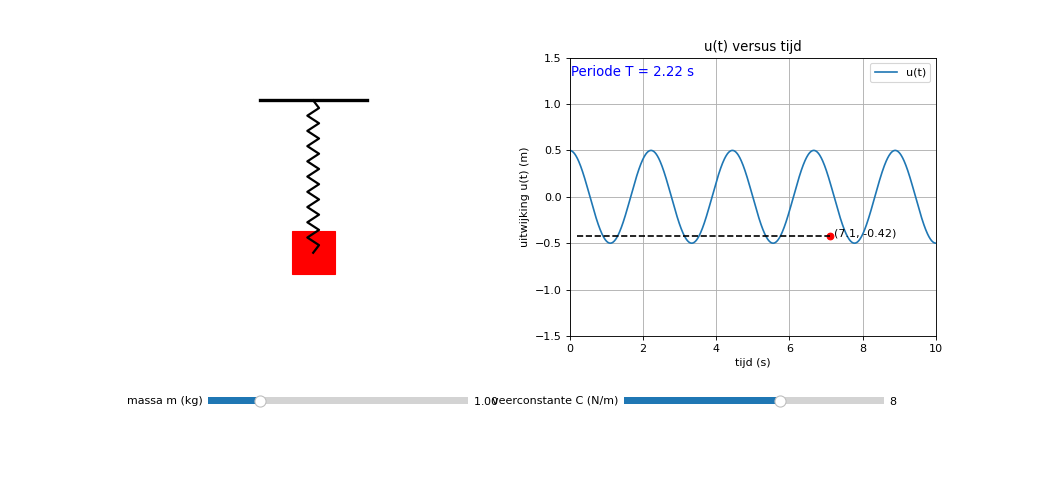

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.widgets import Slider
from matplotlib.animation import FuncAnimation

# Instellingen
initial_m = 1.0
initial_C = 8.0
A = 0.5                  # amplitude
t_max = 10
y_plafond = 2.0          # plafond hoger
y_eq = 1.0               # evenwichtsstand blok
block_height = 0.4
zigzag_segments = 20

# Figuren
fig, (ax_sys, ax_graph) = plt.subplots(1, 2, figsize=(13, 6))
plt.subplots_adjust(bottom=0.3)

# ===== Massa-veersysteem =====
ax_sys.set_xlim(-1, 1)
ax_sys.set_ylim(-0.2, 2.4)
ax_sys.set_aspect('equal')
ax_sys.axis('off')

# Plafondlijn
ax_sys.plot([-0.5, 0.5], [y_plafond, y_plafond], color='black', lw=3)

# Massa blokje
mass_rect = Rectangle((-0.2, y_eq - A - block_height / 2), 0.4, block_height, color='red')
ax_sys.add_patch(mass_rect)

# Zigzagveer
spring_line, = ax_sys.plot([], [], color='black', lw=2)

# ===== u(t)-grafiek =====
t_vals = np.linspace(0, t_max, 1000)
omega_init = np.sqrt(initial_C / initial_m)
u_vals = A * np.cos(omega_init * t_vals)

graph_line, = ax_graph.plot(t_vals, u_vals, label='u(t)')
marker_dot, = ax_graph.plot([], [], 'ro')
link_line, = ax_graph.plot([], [], 'k--')
coord_text = ax_graph.text(0, 0, '', fontsize=10, ha='left')
T_text = ax_graph.text(0.05, 1.3, '', fontsize=12, ha='left', color='blue')

ax_graph.set_xlim(0, t_max)
ax_graph.set_ylim(-1.5, 1.5)
ax_graph.set_xlabel('tijd (s)')
ax_graph.set_ylabel('uitwijking u(t) (m)')
ax_graph.set_title('u(t) versus tijd')
ax_graph.grid(True)
ax_graph.legend()

# ===== Sliders =====
ax_m = plt.axes([0.2, 0.15, 0.25, 0.03])
slider_m = Slider(ax_m, 'massa m (kg)', 0.25, 4.0, valinit=initial_m)
ax_C = plt.axes([0.6, 0.15, 0.25, 0.03])
slider_C = Slider(ax_C, 'veerconstante C (N/m)', 5.0, 10.0, valinit=initial_C)

# ===== Zigzag generator =====
def create_zigzag(y_top, y_bottom, width=0.05, segments=20):
    ys = np.linspace(y_top, y_bottom, segments + 1)
    xs = []
    for i in range(segments + 1):
        xs.append(width if i % 2 == 0 else -width)
    xs[0] = xs[-1] = 0
    return xs, ys

# ===== Update functie =====
def update(frame):
    m = slider_m.val
    C = slider_C.val
    omega = np.sqrt(C / m)
    T = 2 * np.pi / omega

    t = (frame / 50) % t_max
    u = A * np.cos(2*omega * t)  # uitwijking naar beneden

    # Massa positie (onder het plafond)
    y_center = y_eq + u
    y_mass_top = y_center - block_height / 2
    mass_rect.set_y(y_mass_top)

    # Zigzagveer tekenen
    zigzag_width = 0.03 + 0.1 * (u / A)
    xs, ys = create_zigzag(y_plafond, y_center, width=zigzag_width, segments=zigzag_segments)
    spring_line.set_data(xs, ys)

    # u(t)-grafiek
    graph_line.set_ydata(A * np.cos(omega * t_vals))
    marker_dot.set_data([t], [u])
    link_line.set_data([0.2, t], [u, u])
    coord_text.set_position((t + 0.1, u))
    coord_text.set_text(f"({t:.1f}, {u:.2f})")
    T_text.set_text(f"Periode T = {T:.2f} s")

# ===== Start animatie =====
ani = FuncAnimation(fig, update, frames=np.arange(0, 10000), interval=20)
plt.show()


## 6.2 Lopende golven
De harmonische trillingen die we tot nu toe hebben gezien waren in 1 punt in de ruimte. Maar golf kan zich ook verplaatsen door de ruimte. Neem bijvoorbeeld een transversale golf. Die golf heeft een lengte λ die zich verplaatst in de tijd. Zoals te zien in het figuur hieronder beweegt in het u(x) diagram de golf sneller bij een hogere frequentie. Dat is logisch, hij verplaatst zijn gollengte in een kortere tijd T. Dit kun je ook zien in de grafiek hieronder. Bij een hogere golflengte gaat de golf nog sneller, want hij legt een grotere afstand af in 1 trilling. Snelheid berekenen we door de afstand over de tijd te nemen. Golfsneleheid zou dan de golf lengte over de trillingstijd moeten zijn.


<IPython.core.display.Javascript object>


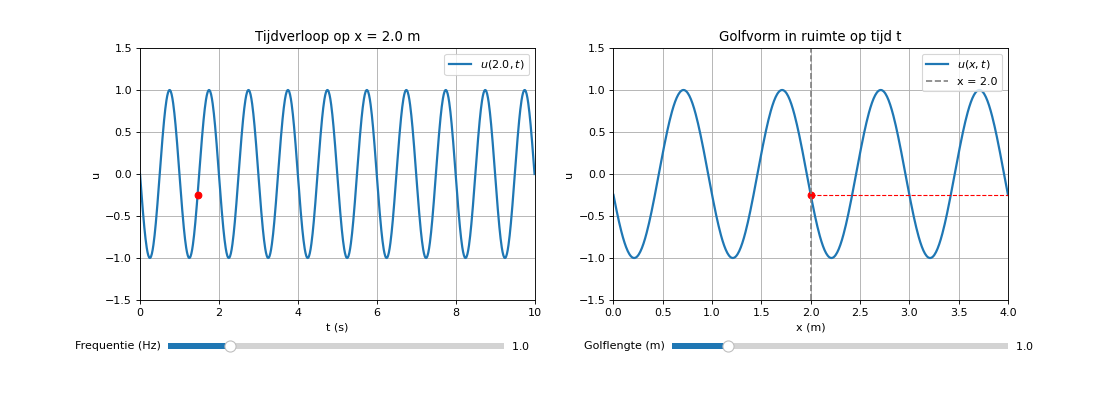

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Slider

# Constantes
A = 1.0
x_vals = np.linspace(0, 4, 500)
t_vals = np.linspace(0, 10, 1000)
x_probe = 2.0  # Positie voor u(t)

# Startwaarden
initial_lambda = 1.0
initial_freq = 1.0

# Setup figuur
fig, (ax_ut, ax_ux) = plt.subplots(1, 2, figsize=(14, 5))
plt.subplots_adjust(bottom=0.25)

### u(t) grafiek (links)
ut_line, = ax_ut.plot([], [], lw=2, label=f'$u({x_probe}, t)$')
dot_ut, = ax_ut.plot([], [], 'ro')
ax_ut.set_xlim(0, 10)
ax_ut.set_ylim(-1.5, 1.5)
ax_ut.set_xlabel('t (s)')
ax_ut.set_ylabel('u')
ax_ut.set_title(f'Tijdverloop op x = {x_probe} m')
ax_ut.grid(True)
ax_ut.legend()

### u(x) grafiek (rechts)
wave_line, = ax_ux.plot([], [], lw=2, label='$u(x, t)$')
dot_ux, = ax_ux.plot([], [], 'ro')  # Punt op x=2
vertical_line = ax_ux.axvline(x_probe, color='gray', linestyle='--', label=f'x = {x_probe}')
line_connector, = ax_ux.plot([], [], 'r--', lw=1)  # Lijn tussen beide grafieken
ax_ux.set_xlim(0, 4)
ax_ux.set_ylim(-1.5, 1.5)
ax_ux.set_xlabel('x (m)')
ax_ux.set_ylabel('u')
ax_ux.set_title('Golfvorm in ruimte op tijd t')
ax_ux.grid(True)
ax_ux.legend()

# Sliders
ax_freq = plt.axes([0.15, 0.12, 0.3, 0.03])
slider_freq = Slider(ax_freq, 'Frequentie (Hz)', 0.1, 5.0, valinit=initial_freq)

ax_lambda = plt.axes([0.6, 0.12, 0.3, 0.03])
slider_lambda = Slider(ax_lambda, 'Golflengte (m)', 0.2, 5.0, valinit=initial_lambda)

# Golfvergelijking
def u_xt(x, t, f, lambd):
    return A * np.sin(2 * np.pi * (x / lambd - f * t))

# Tijd-as voor u(t)
ut_time_vals = np.linspace(0, 10, 1000)

# u(t) data wordt niet opnieuw berekend per frame
def update(frame):
    t = frame / 50
    f = slider_freq.val
    lambd = slider_lambda.val

    # u(t) plot
    ut_vals = u_xt(x_probe, ut_time_vals, f, lambd)
    ut_line.set_data(ut_time_vals, ut_vals)
    u_now = u_xt(x_probe, t, f, lambd)
    dot_ut.set_data([t], [u_now])

    # u(x) plot
    y_vals = u_xt(x_vals, t, f, lambd)
    wave_line.set_data(x_vals, y_vals)
    dot_ux.set_data([x_probe], [u_now])

    # Lijn van dot_ut naar dot_ux (verbinden)
    # Gebaseerd op plotposities
    ut_x_pix = ax_ut.transData.transform((t, u_now))
    ux_x_pix = ax_ux.transData.transform((x_probe, u_now))

    # Vertalen naar data voor connectorlijn (y-waarde blijft u_now)
    # Rechte lijn van (x_probe, u_now) op u(x) naar zelfde y op u(t)
    line_connector.set_data([x_probe, 4.3], [u_now, u_now])  # 4.3 is buiten zicht maar geeft visuele lijn naar links

ani = FuncAnimation(fig, update, frames=np.arange(0, 1000), interval=20)
plt.show()


# 6.3 Staande golven


<IPython.core.display.Javascript object>


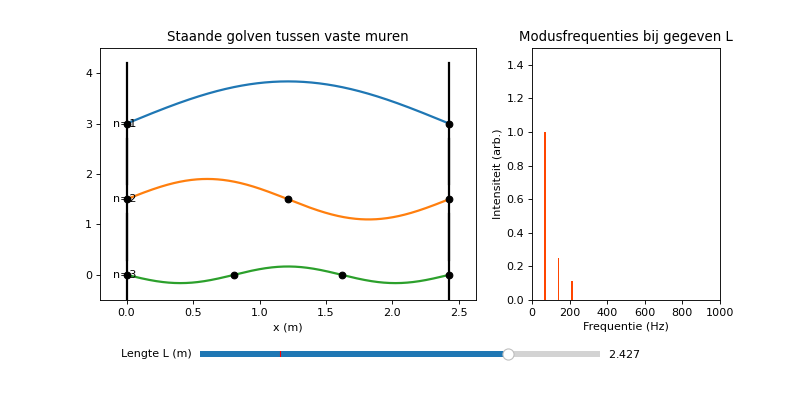

In [21]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from matplotlib.animation import FuncAnimation
import matplotlib.gridspec as gridspec

# Constantes
v = 340  # geluidssnelheid (m/s)
initial_L = 1.0
n_modes = [1, 2, 3]
t = 0
fps = 30

# Setup figuur
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])
ax_wave = fig.add_subplot(gs[0])
ax_freq = fig.add_subplot(gs[1])

plt.subplots_adjust(bottom=0.25)

# Slider
ax_slider_L = plt.axes([0.25, 0.1, 0.5, 0.03])
slider_L = Slider(ax_slider_L, 'Lengte L (m)', 0.5, 3.0, valinit=initial_L)

# Tijdvariabele
def update(frame):
    global t
    t += 1 / fps
    L = slider_L.val
    x = np.linspace(0, L, 500)

    ax_wave.clear()
    for idx, n in enumerate(n_modes):
        offset = (2 - idx) * 1.5
        λ = 2 * L / n
        f = v / λ
        y = np.sin(n * np.pi * x / L) * np.cos(2 * np.pi * f * t)
        ax_wave.plot(x, y + offset, lw=2)
        ax_wave.plot([0, 0], [offset - 1.2, offset + 1.2], 'k', lw=2)
        ax_wave.plot([L, L], [offset - 1.2, offset + 1.2], 'k', lw=2)
        knopen_x = np.linspace(0, L, n + 1)
        ax_wave.plot(knopen_x, np.zeros_like(knopen_x) + offset, 'ko')
        ax_wave.text(-0.1, offset, f"n={n}", va='center')

    ax_wave.set_xlim(-0.2, L + 0.2)
    ax_wave.set_ylim(-0.5, 4.5)
    ax_wave.set_xlabel("x (m)")
    ax_wave.set_title("Staande golven tussen vaste muren")

    # Nieuwe frequentieplot
    ax_freq.clear()
    freqs = [v / (2 * L / n) for n in n_modes]
    intensities = [1 / n**2 for n in n_modes]  # optioneel: intensiteit af laten nemen met n
    ax_freq.bar(freqs, intensities, width=10, color='orangered', align='center')

    ax_freq.set_xlim(0, 1000)
    ax_freq.set_ylim(0, max(intensities) * 1.5)
    ax_freq.set_xlabel("Frequentie (Hz)")
    ax_freq.set_ylabel("Intensiteit (arb.)")
    ax_freq.set_title("Modusfrequenties bij gegeven L")

# Slider update
def slider_changed(val):
    update(0)

slider_L.on_changed(slider_changed)

# Start animatie
ani = FuncAnimation(fig, update, interval=1000/fps)
plt.show()
